In [1]:
%load_ext autoreload
%autoreload 2
from evaluate_numeral_context import Evaluator
import pickle
import numpy as np
import pandas as pd

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
filtered_dataset = pickle.load(open('build/data_filtered_0.05Bnotable.test.v2.pkl','rb'))
nc = pickle.load(open('../../data/wikipedia/preprocess0.05Bnotable/NumeralAsNumeral/nc.dat','rb'))
idx2word = pickle.load(open('../../data/wikipedia/preprocess0.05Bnotable/NumeralAsNumeral/idx2word.dat','rb'))
wc = pickle.load(open('../../data/wikipedia/preprocess0.05Bnotable/NumeralAsNumeral/wc.dat','rb'))
word2idx = pickle.load(open('../../data/wikipedia/preprocess0.05Bnotable/NumeralAsNumeral/word2idx.dat','rb'))

In [134]:
e1 = Evaluator(
    filtered_dataset,
    wc,
    nc,
    idx2word,
    word2idx
)

length of dataset: 400 
dataset examples: 
 [('19.1', ['are', 'the', 'second', 'largest', 'group', 'the', 'next', 'largest', 'group', 'is']), ('896.0', ['were', 'attacking', 'lazio', 'on', 'april', 'formosus', 'died', 'he', 'was', 'succeeded']), ('5.3', ['carrier', 'sc', 'mode', 'up', 'to', 'gbit', 'high', 'speed', 'interface', 'hsi']), ('83.0', ['censors', 'refused', 'to', 'classify', 'the', '-', 'minute', 'version', 'of', 'the']), ('1848.0', ['america', 'from', 'ireland', 'and', 'the', 'discovery', 'of', 'gold', 'in', 'the'])] 
numeral examples : [  19.1  896.     5.3   83.  1848.  1012.   167.   412.   228.6 1038. ] 
 


Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors


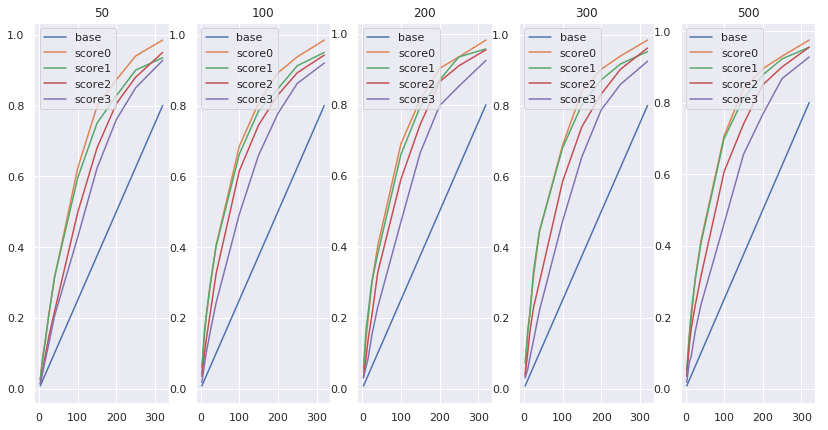

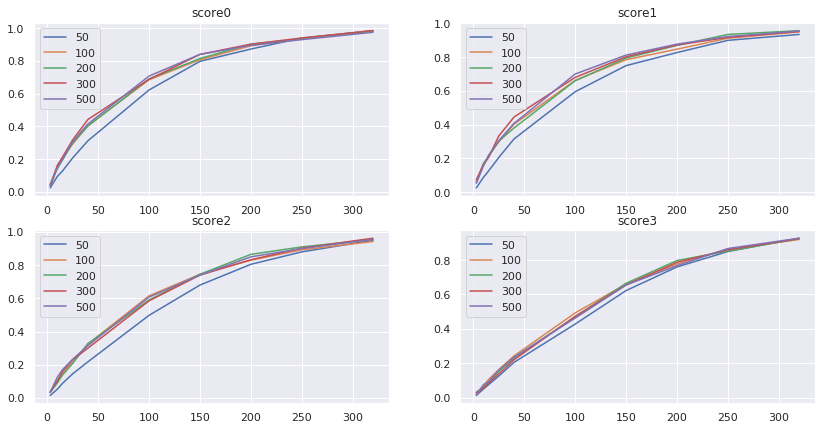

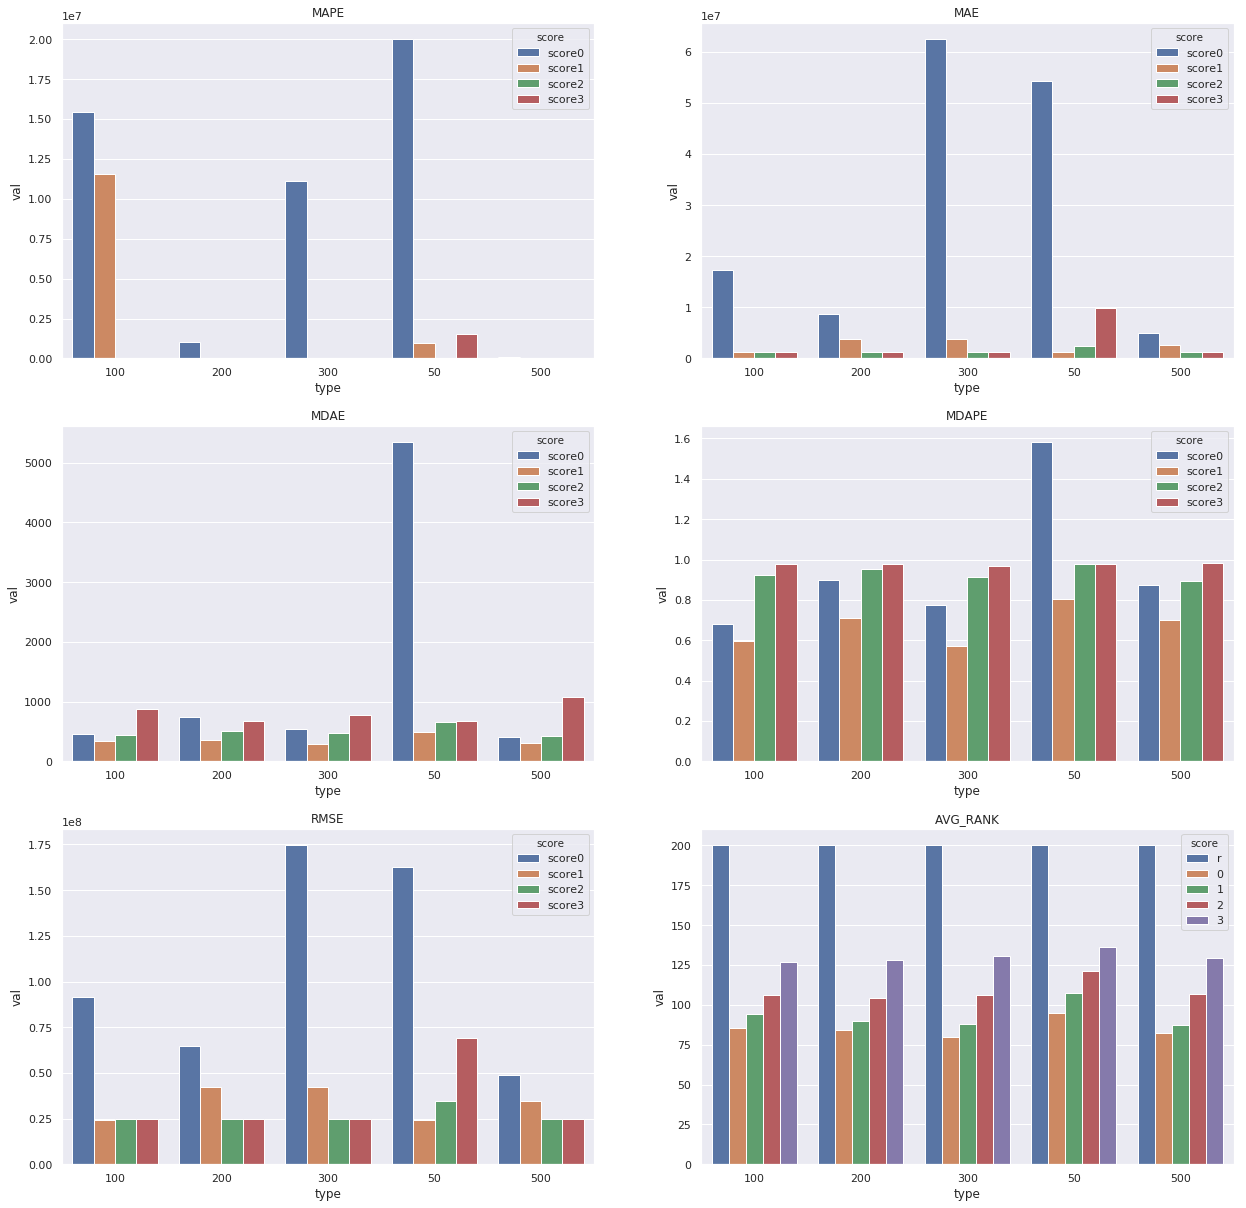

In [135]:
prototype_size = ['50', '100', '200', '300', '500']

res_sz = {}
for sz in prototype_size:
    
    idx2vec_o = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/prototypes/{}/idx2vec_o_epoch5.dat'.format(sz),'rb'))
    idx2vec_i = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/prototypes/{}/idx2vec_i_epoch5.dat'.format(sz),'rb'))
    trained_prototypes = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/prototypes/{}/trained_prototypes_epoch5.dat'.format(sz),'rb'))
    
    e1.load_prototype(idx2vec_i, idx2vec_o, trained_prototypes)
    res_sz[sz] = e1.eval_all(varbose=False)
    
e1.draw(res_sz)

In [115]:
e1.flod_score(res_sz, 0)

,RMSE,avg_rank,mae,mape,mdae,mdape,topk,x
50,113381,24.35,40490.8,121753,1753.86,0.997406,"[0.04, 0.12, 0.28, 0.47, 0.64, 0.81, 0.87, 0.9...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"
100,53755.7,23.87,13900.2,1688.76,1330.5,0.861323,"[0.04, 0.11, 0.36, 0.49, 0.67, 0.8, 0.87, 0.91...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"
200,49865.6,22.62,12873,510.561,196,0.493524,"[0.05, 0.16, 0.35, 0.52, 0.67, 0.8, 0.9, 0.93,...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"
300,47651.3,20.81,9292.91,1226.75,1493.77,0.874896,"[0.03, 0.11, 0.4, 0.58, 0.77, 0.85, 0.88, 0.92...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"
500,65193.1,22.84,13445.1,1416.25,274,0.596055,"[0.05, 0.08, 0.41, 0.54, 0.7, 0.78, 0.86, 0.91...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"


In [116]:
e1.flod_model(res_sz, '50')

{'RMSE': array([113381.07348289,  94008.03061428,  49982.4002022 ,  48183.31073987]), 'mape': array([121752.71412869, 124953.27709884,    209.96569467,    274.46312656]), 'mae': array([40490.84742, 28062.24908, 10554.22448,  8963.14204]), 'mdae': array([1753.86,  503.5 ,  598.85,  685.  ]), 'mdape': array([0.99740572, 0.64226442, 0.8061973 , 0.85543281]), 'avg_rank': [24.35, 25.39, 28.03, 32.37]}


,0,1,2,3
RMSE,113381.073483,94008.030614,49982.400202,48183.310740
mape,121752.714129,124953.277099,209.965695,274.463127
mae,40490.847420,28062.249080,10554.224480,8963.142040
mdae,1753.860000,503.500000,598.850000,685.000000
mdape,0.997406,0.642264,0.806197,0.855433
avg_rank,24.350000,25.390000,28.030000,32.370000


Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors


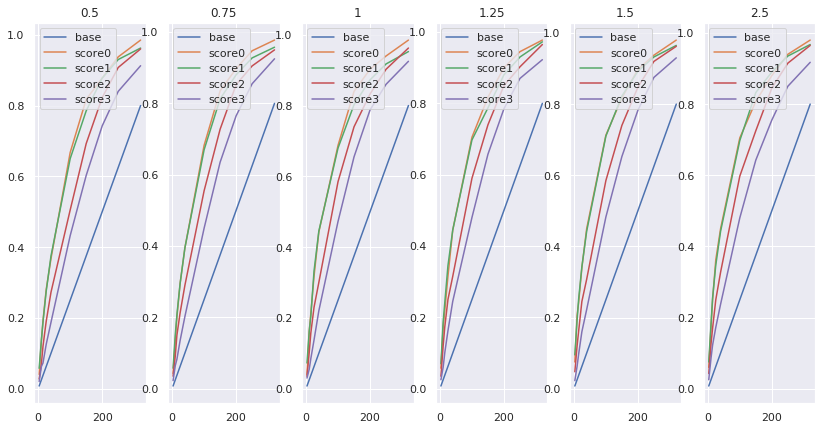

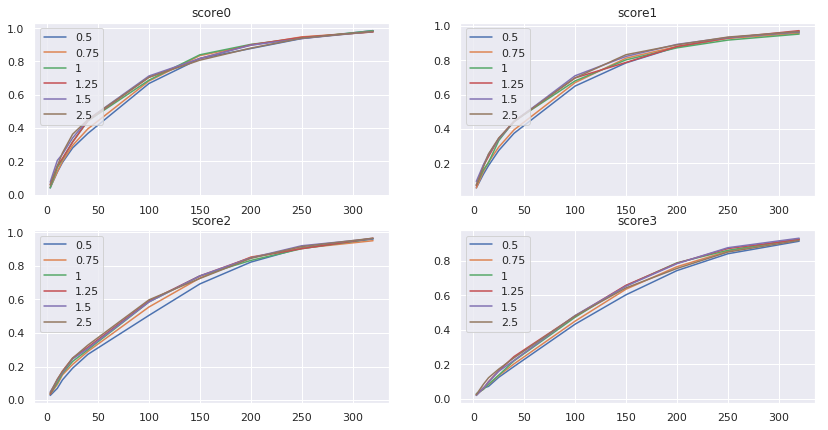

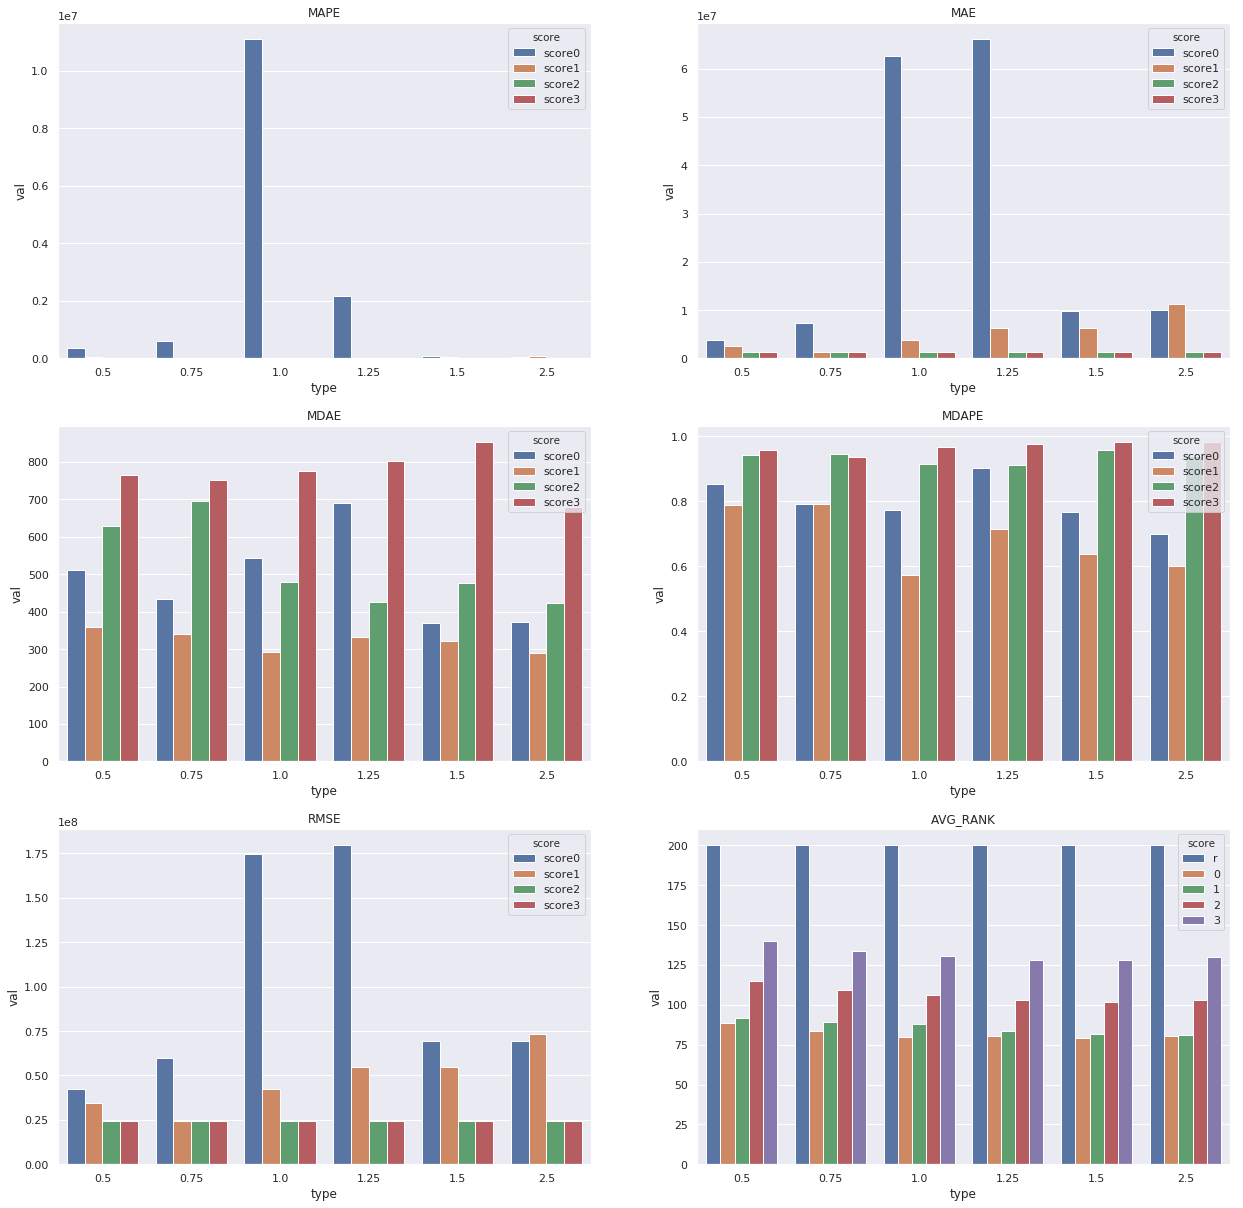

In [136]:
alphas = [0.5, 0.75, 1, 1.25, 1.5, 2.5]
res_alpha = {}

for alpha in alphas:
    
    idx2vec_o = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/alpha/{}/idx2vec_o_epoch5.dat'.format(alpha),'rb'))
    idx2vec_i = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/alpha/{}/idx2vec_i_epoch5.dat'.format(alpha),'rb'))
    trained_prototypes = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/alpha/{}/trained_prototypes_epoch5_300_{}.dat'.format(alpha, alpha),'rb'))

    e1.load_prototype(idx2vec_i, idx2vec_o, trained_prototypes, alpha=alpha)
    res_alpha[alpha] = e1.eval_all()
    
e1.draw(res_alpha)
with open('./res/res_alpha_test.v2.json','w') as f:
    f.write(str(res_alpha))

In [137]:
idx2vec_o = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/1/LSTM/idx2vec_o_epoch5.dat','rb'))
idx2vec_i = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/1/LSTM/idx2vec_i_epoch5.dat','rb'))
LSTM_model_path = '../../data/wikipedia/save/0.05Bnotable/1/LSTM/sgns_epoch5.pt'
e1.load_LSTM(idx2vec_i, idx2vec_o, LSTM_model_path)
res_LSTM = e1.eval_all()
print(res)
with open('./res/res_LSTM_test.v2.json','w') as f:
    f.write(str(res))

Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
{0.5: {'x': [3, 10, 15, 25, 40, 100, 150, 200, 250, 320], 'topk': array([[0.0075, 0.025 , 0.0375, 0.0625, 0.1   , 0.25  , 0.375 , 0.5   ,
        0.625 , 0.8   ],
       [0.04  , 0.135 , 0.1925, 0.28  , 0.3675, 0.6675, 0.8175, 0.8775,
        0.9375, 0.985 ],
       [0.0575, 0.1375, 0.1875, 0.275 , 0.375 , 0.65  , 0.785 , 0.8775,
        0.93  , 0.9625],
       [0.0275, 0.07  , 0.12  , 0.19  , 0.2725, 0.505 , 0.6925, 0.8225,
        0.9075, 0.96  ],
       [0.02  , 0.0625, 0.0725, 0.125 , 0.1875, 0.4325, 0.6025, 0.7425,
        0.84  , 0.9125]]), 'RMSE': array([42440661.35660903, 34654068.80808568, 24509601.30246108,
       24509599.96945767]), 'mape': array([378415.07388404,  65415.05718202,   1240.25497913,   1102.61295016]), 'mae': array([3761410.7675135, 2525609.068381 , 1293099.932232 , 1292784.951596 ]), 'mdae': array([510.5  , 358.255, 628.5  , 765.5  ]), 'mdape': array([0.85200076, 0.78775449,

Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors


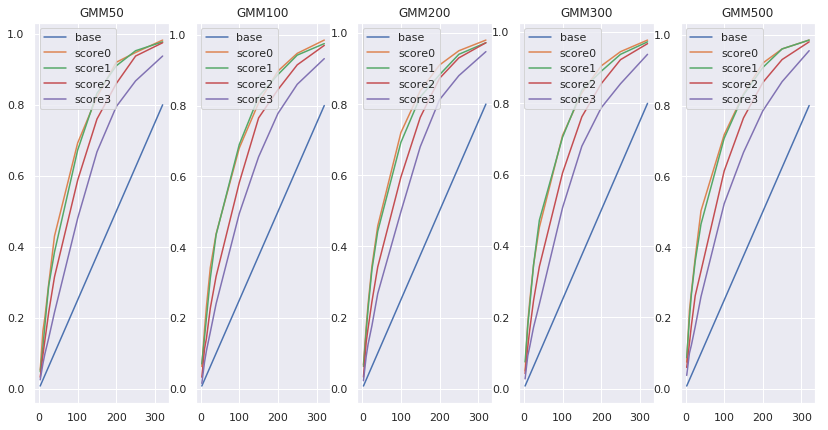

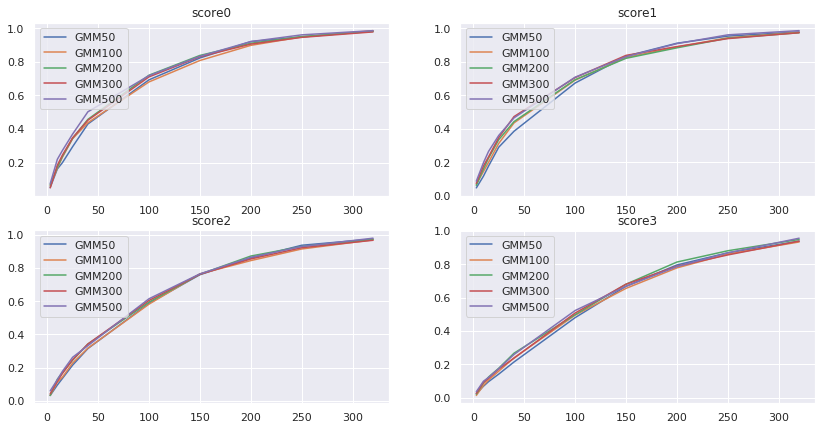

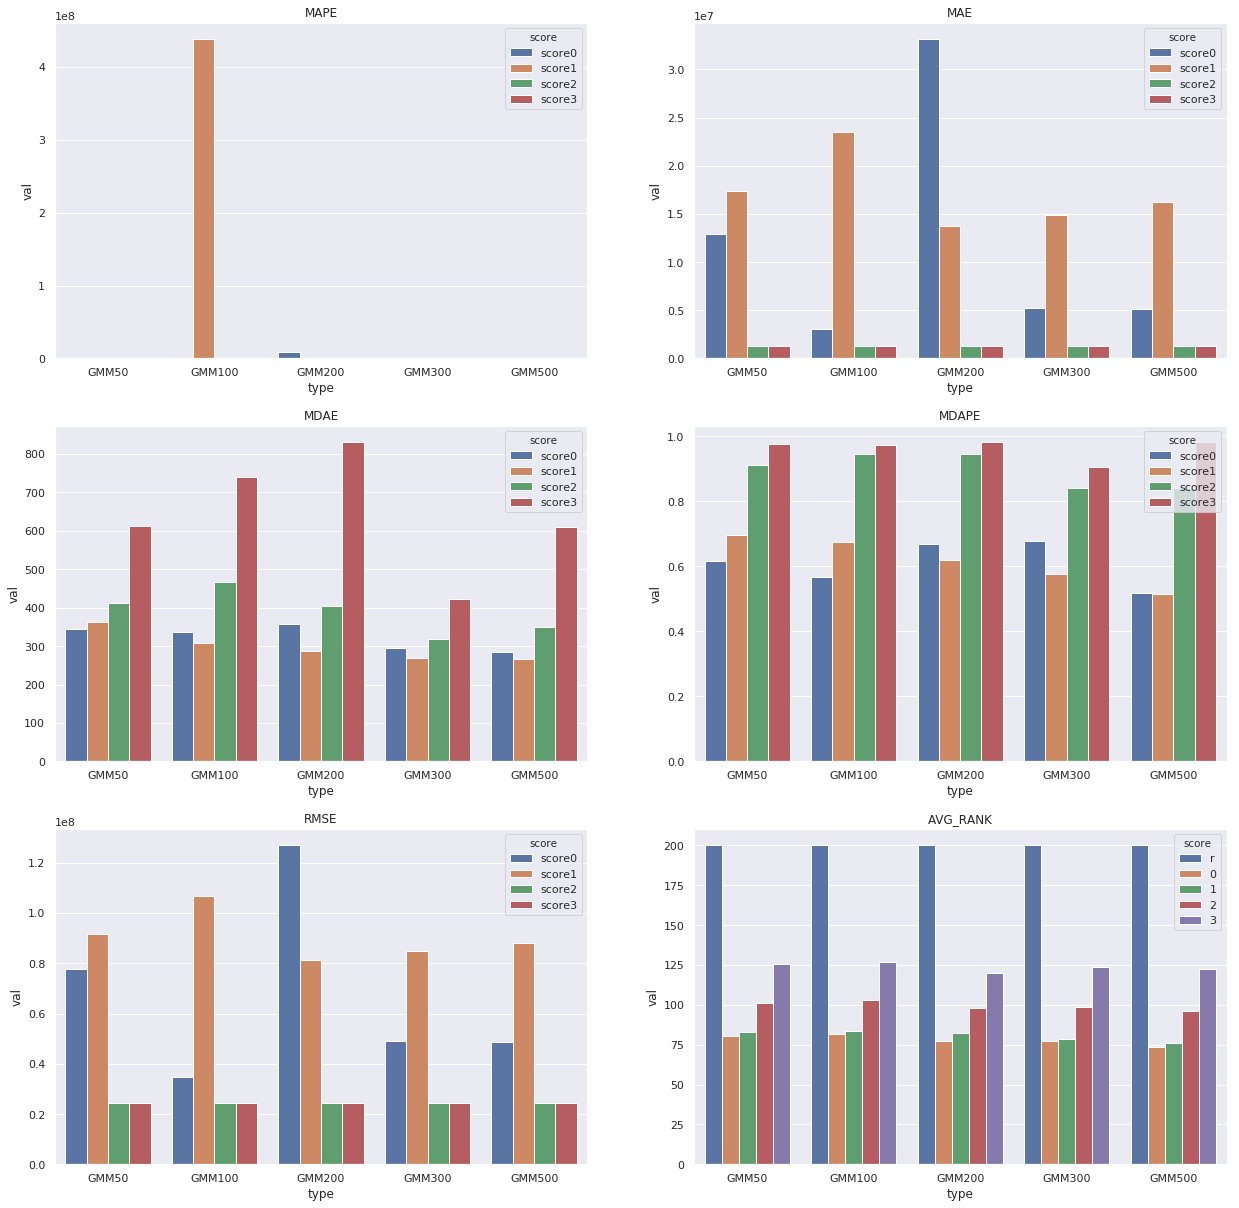

In [138]:
gmms = ['50', '100', '200', '300', '500']
res_gmm = {}

for gmm_name in gmms:

    idx2vec_o = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/gmm/{}-rd/idx2vec_o_epoch5.dat'.format(gmm_name),'rb'))
    idx2vec_i = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/gmm/{}-rd/idx2vec_i_epoch5.dat'.format(gmm_name),'rb'))
    trained_prototypes = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/gmm/{}-rd/trained_gmms_epoch5_{}.dat'.format(gmm_name, gmm_name),'rb'))
    gmm = pickle.load(open('../../data/wikipedia/preprocess0.05Bnotable/NumeralAsNumeral/gmm/gmm-{}-rd.dat'.format(gmm_name),'rb'))

    e1.load_GMM(idx2vec_i, idx2vec_o, trained_prototypes, gmm)
    res_gmm['GMM'+gmm_name] = e1.eval_all()
    
e1.draw(res_gmm)
with open('./res/res_gmm_rd_test.v2.json','w') as f:
    f.write(str(res_gmm))

Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors


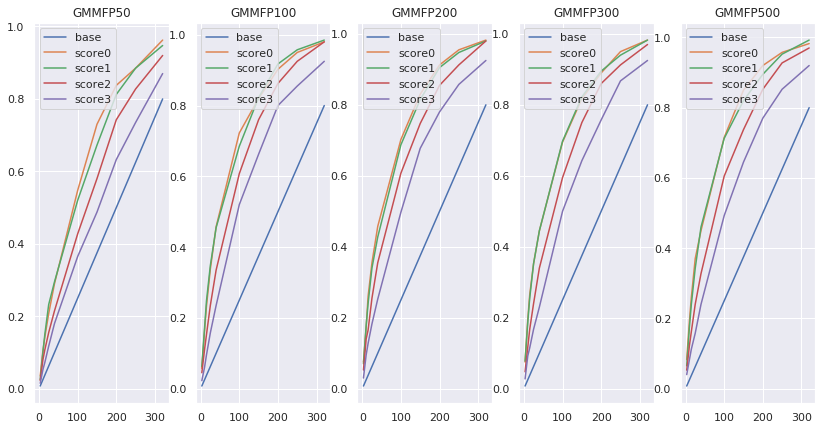

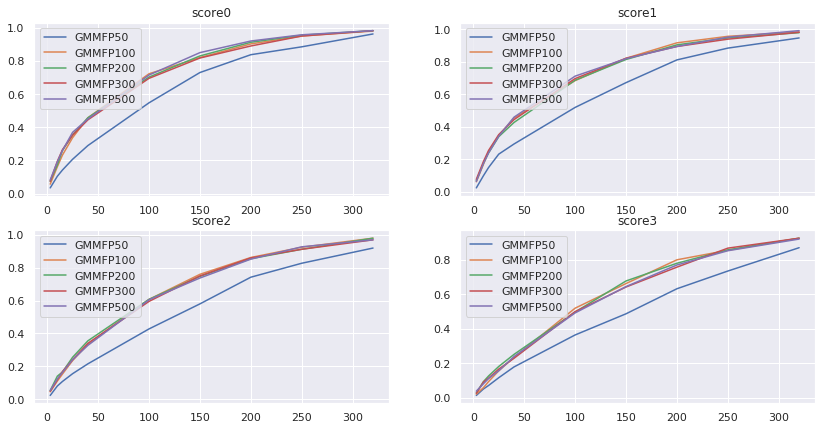

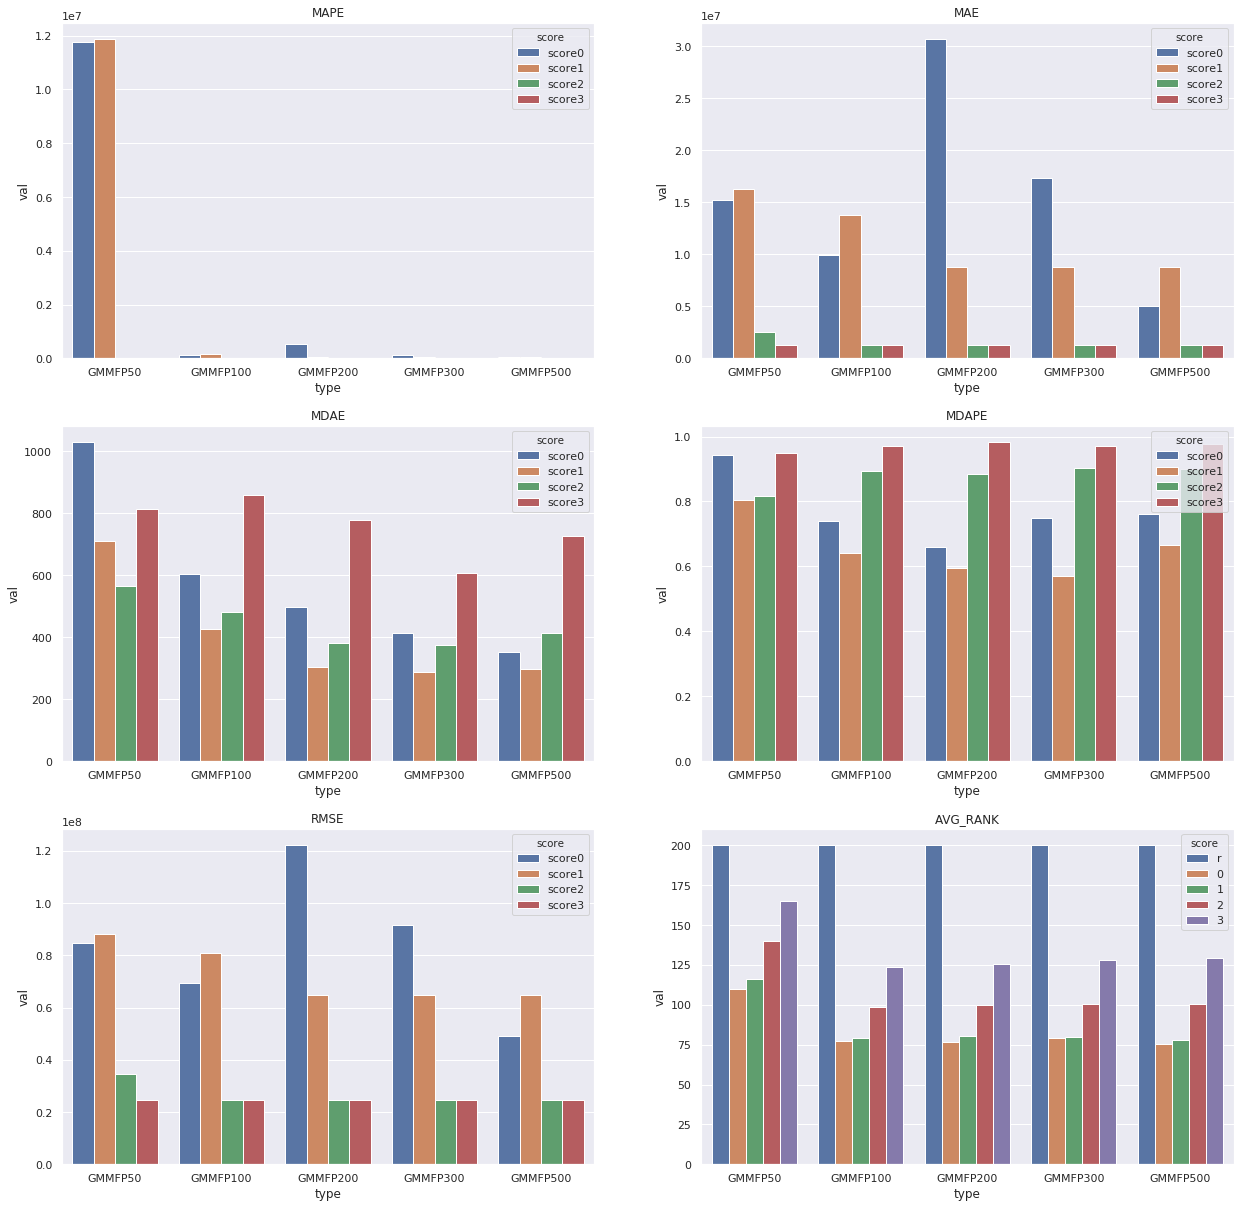

In [139]:
gmms = ['50', '100', '200', '300', '500']
res_gmm_fp = {}

for gmm_name in gmms:

    idx2vec_o = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/gmm/{}-fp/idx2vec_o_epoch5.dat'.format(gmm_name),'rb'))
    idx2vec_i = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/gmm/{}-fp/idx2vec_i_epoch5.dat'.format(gmm_name),'rb'))
    trained_prototypes = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/gmm/{}-fp/trained_gmms_epoch5_{}.dat'.format(gmm_name, gmm_name),'rb'))
    gmm = pickle.load(open('../../data/wikipedia/preprocess0.05Bnotable/NumeralAsNumeral/gmm/gmm-{}-fp.dat'.format(gmm_name),'rb'))

    e1.load_GMM(idx2vec_i, idx2vec_o, trained_prototypes, gmm)
    res_gmm_fp['GMMFP'+gmm_name] = e1.eval_all()
    
e1.draw(res_gmm_fp)
with open('./res/res_gmm_fp_test.v2.json','w') as f:
    f.write(str(res_gmm_fp))

Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors


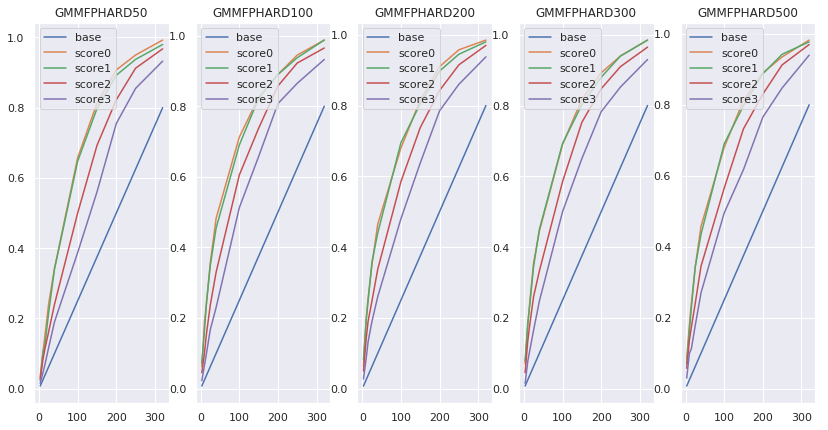

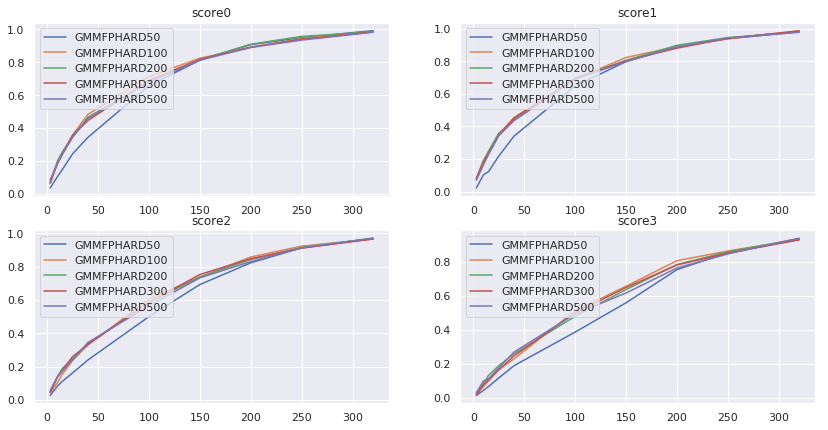

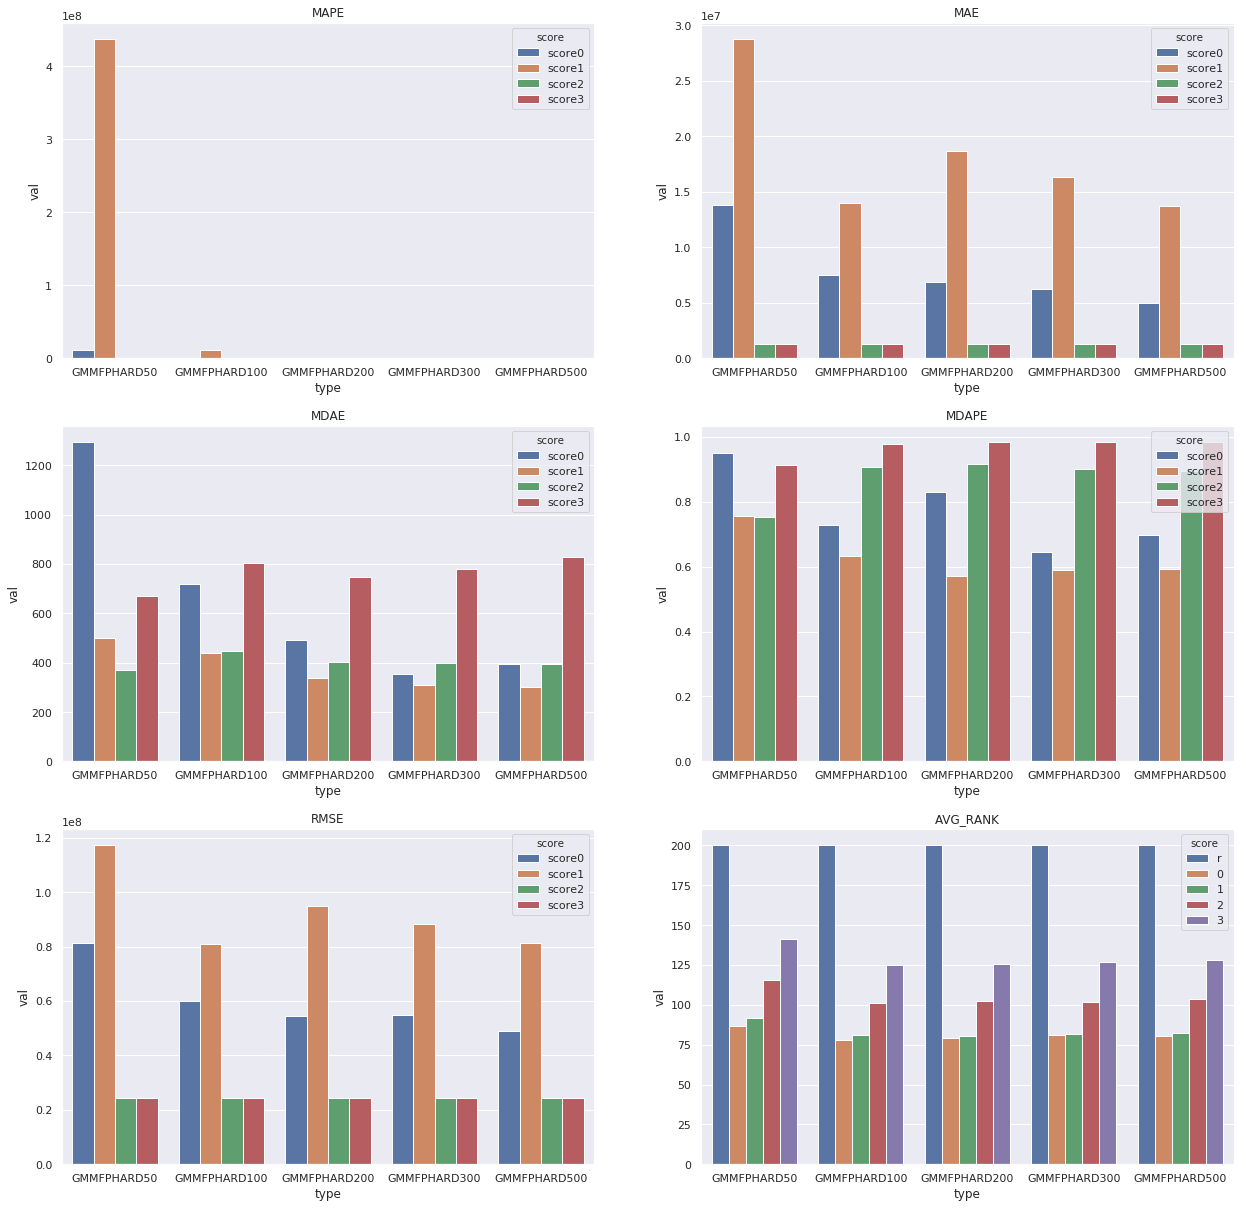

In [140]:
gmms = ['50', '100', '200', '300', '500']
res_gmm_fp_hard = {}

for gmm_name in gmms:

    idx2vec_o = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/gmm/{}-fp-hard/idx2vec_o_epoch5.dat'.format(gmm_name),'rb'))
    idx2vec_i = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/gmm/{}-fp-hard/idx2vec_i_epoch5.dat'.format(gmm_name),'rb'))
    trained_prototypes = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/gmm/{}-fp-hard/trained_gmms_epoch5_{}.dat'.format(gmm_name, gmm_name),'rb'))
    gmm = pickle.load(open('../../data/wikipedia/preprocess0.05Bnotable/NumeralAsNumeral/gmm/gmm-{}-fp-hard.dat'.format(gmm_name),'rb'))

    e1.load_GMM(idx2vec_i, idx2vec_o, trained_prototypes, gmm)
    res_gmm_fp_hard['GMMFPHARD'+gmm_name] = e1.eval_all()
    
e1.draw(res_gmm_fp_hard)
with open('./res/res_gmm_fp_test.v2.json','w') as f:
    f.write(str(res_gmm_fp_hard))

Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors


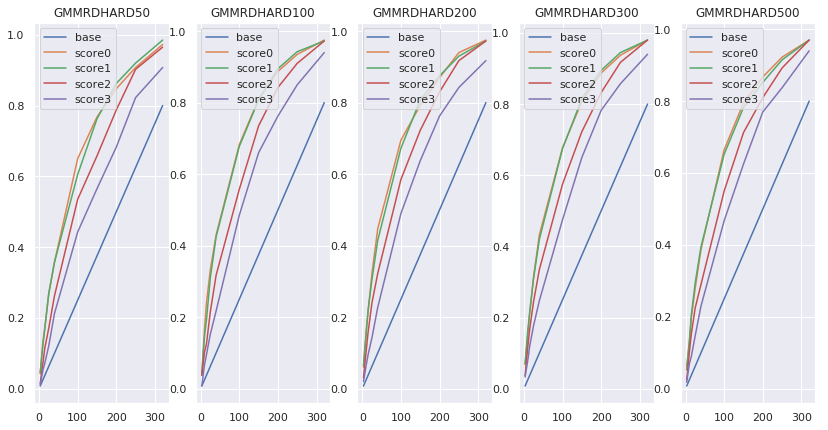

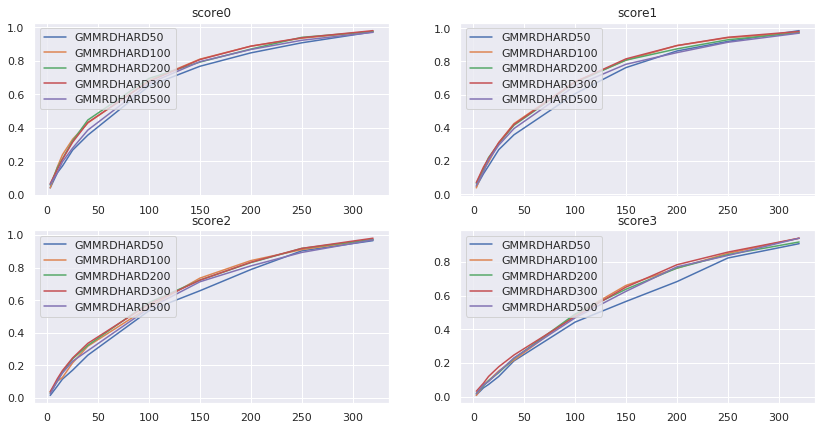

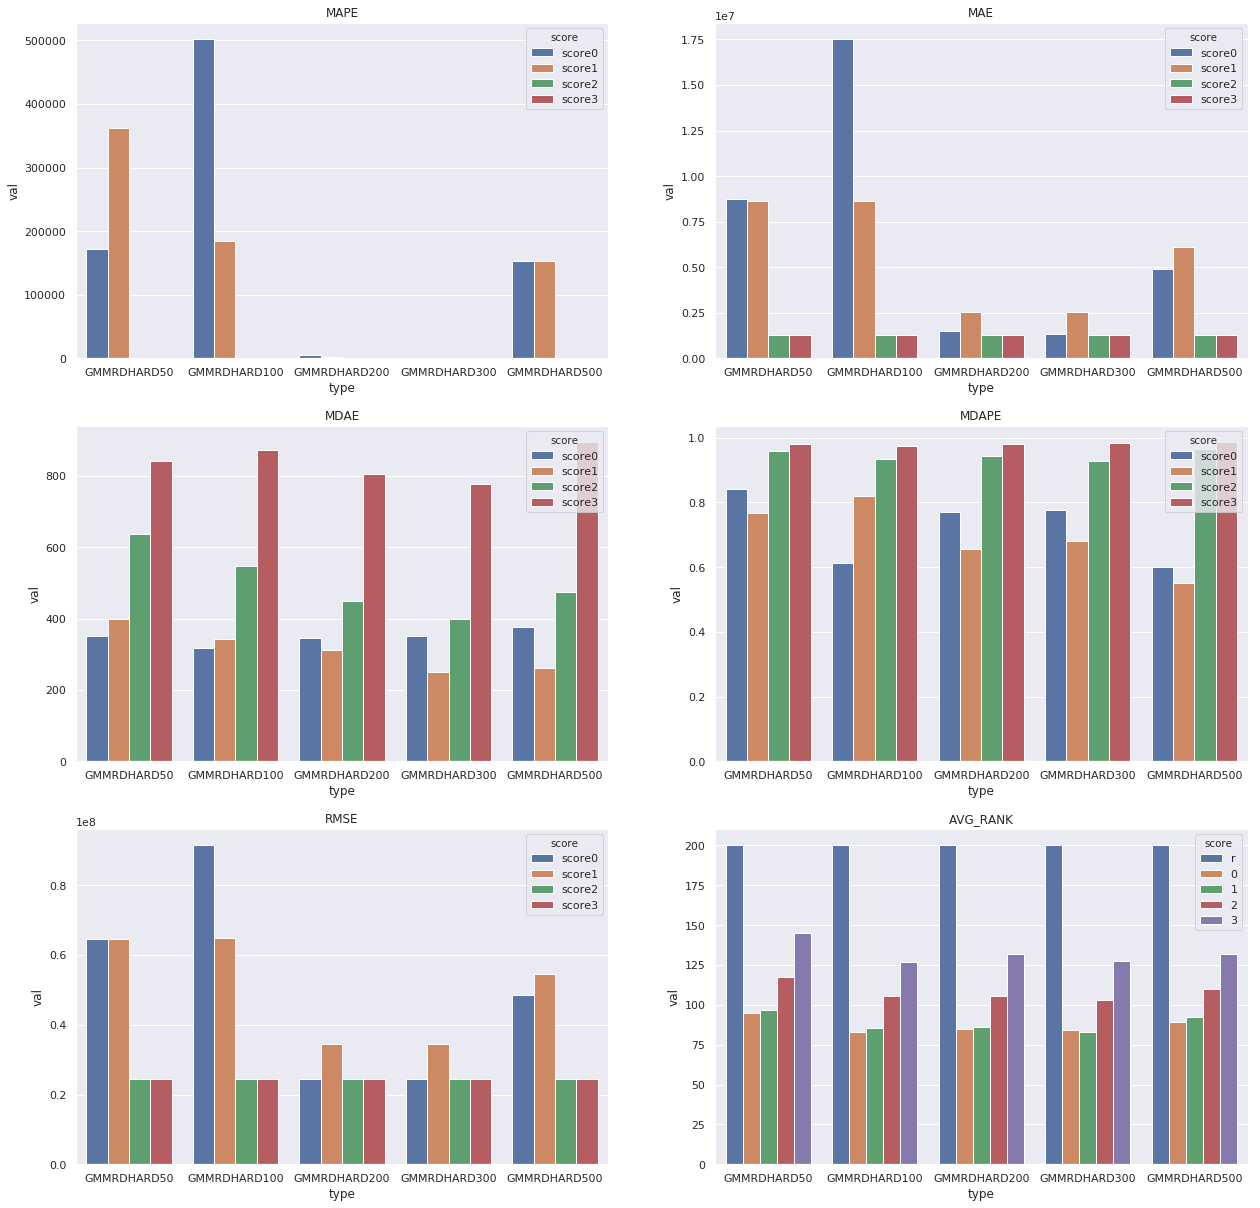

In [141]:
gmms = ['50', '100', '200', '300', '500']
res_gmm_rd_hard = {}

for gmm_name in gmms:

    idx2vec_o = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/gmm/{}-rd-hard/idx2vec_o_epoch5.dat'.format(gmm_name),'rb'))
    idx2vec_i = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/gmm/{}-rd-hard/idx2vec_i_epoch5.dat'.format(gmm_name),'rb'))
    trained_prototypes = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/gmm/{}-rd-hard/trained_gmms_epoch5_{}.dat'.format(gmm_name, gmm_name),'rb'))
    gmm = pickle.load(open('../../data/wikipedia/preprocess0.05Bnotable/NumeralAsNumeral/gmm/gmm-{}-rd-hard.dat'.format(gmm_name),'rb'))

    e1.load_GMM(idx2vec_i, idx2vec_o, trained_prototypes, gmm)
    res_gmm_rd_hard['GMMRDHARD'+gmm_name] = e1.eval_all()
    
e1.draw(res_gmm_rd_hard)
with open('./res/res_gmm_rd_hard_test.v2.json','w') as f:
    f.write(str(res_gmm_rd_hard))

In [123]:
res_gmm_rd_hard

{'GMMRDHARD50': {'x': [1, 3, 10, 15, 25, 40, 50, 60, 80, 100],
  'topk': array([[0.01, 0.03, 0.1 , 0.15, 0.25, 0.4 , 0.5 , 0.6 , 0.8 , 1.  ],
         [0.06, 0.11, 0.36, 0.39, 0.62, 0.76, 0.82, 0.9 , 0.96, 1.  ],
         [0.04, 0.08, 0.37, 0.41, 0.56, 0.74, 0.81, 0.88, 0.94, 1.  ],
         [0.03, 0.12, 0.34, 0.39, 0.52, 0.65, 0.76, 0.85, 0.94, 1.  ],
         [0.02, 0.05, 0.25, 0.33, 0.44, 0.57, 0.67, 0.73, 0.9 , 1.  ]]),
  'RMSE': array([104972.61157466, 117678.14007386,  48562.30591365,  48161.12652764]),
  'mape': array([1199.34031116, 5031.28660198,  304.36614876,  286.42767053]),
  'mae': array([32809.25094, 35092.25404,  9458.02514,  8965.12024]),
  'mdae': array([337.35, 563.5 , 668.  , 794.  ]),
  'mdape': array([0.66410042, 0.81376412, 0.74101358, 0.93811238]),
  'avg_rank': [50.5, 26.5, 28.14, 31.24, 37.48]},
 'GMMRDHARD100': {'x': [1, 3, 10, 15, 25, 40, 50, 60, 80, 100],
  'topk': array([[0.01, 0.03, 0.1 , 0.15, 0.25, 0.4 , 0.5 , 0.6 , 0.8 , 1.  ],
         [0.06, 0.17, 0.

# Numeral Tokens

In [142]:
filtered_dataset = pickle.load(open('build/data_filtered_0.05Bnotable.test.v2.pkl','rb'))
nc = pickle.load(open('../../data/wikipedia/preprocess0.05Bnotable/NumeralAsTokenUnkNumeral/nc.dat','rb'))
idx2word = pickle.load(open('../../data/wikipedia/preprocess0.05Bnotable/NumeralAsTokenUnkNumeral/idx2word.dat','rb'))
wc = pickle.load(open('../../data/wikipedia/preprocess0.05Bnotable/NumeralAsTokenUnkNumeral/wc.dat','rb'))
word2idx = pickle.load(open('../../data/wikipedia/preprocess0.05Bnotable/NumeralAsTokenUnkNumeral/word2idx.dat','rb'))

In [143]:
e2 = Evaluator(
    filtered_dataset,
    wc,
    nc,
    idx2word,
    word2idx
)

length of dataset: 400 
dataset examples: 
 [('19.1', ['are', 'the', 'second', 'largest', 'group', 'the', 'next', 'largest', 'group', 'is']), ('896.0', ['were', 'attacking', 'lazio', 'on', 'april', 'formosus', 'died', 'he', 'was', 'succeeded']), ('5.3', ['carrier', 'sc', 'mode', 'up', 'to', 'gbit', 'high', 'speed', 'interface', 'hsi']), ('83.0', ['censors', 'refused', 'to', 'classify', 'the', '-', 'minute', 'version', 'of', 'the']), ('1848.0', ['america', 'from', 'ireland', 'and', 'the', 'discovery', 'of', 'gold', 'in', 'the'])] 
numeral examples : [  19.1  896.     5.3   83.  1848.  1012.   167.   412.   228.6 1038. ] 
 


In [144]:
idx2vec_o = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/1/NumeralAsTokenUnkNumeral/idx2vec_o_epoch5.dat','rb'))
idx2vec_i = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/1/NumeralAsTokenUnkNumeral/idx2vec_i_epoch5.dat','rb'))
e2.load_TOKEN(idx2vec_i, idx2vec_o)
res_toks = {}
res_token = e2.eval_all()
# with open('./res/res_token_test.v2.json','w') as f:
#     f.write(str(res))
# print(res)
    
res_random = e2.eval_all(random=True)
# with open('./res/res_random_test.v2.json','w') as f:
#     f.write(str(res))
# print(res)

res_toks['token'] = res_token
res_toks['random'] = res_random

Computing mean vectors, missing 50 vectors
Computing mean vectors, missing 50 vectors
oov: 228.6
oov: 9.82
oov: 31395.0
oov: 6852.0
oov: 4760.0
oov: 55.4
oov: 1.0025
oov: 38400.0
oov: 4.57
oov: 242885.0
oov: 634.5
oov: 1022000.0
oov: 30069.0
oov: 46354.0
oov: 6958.0
oov: 182000.0
oov: 2930.0
oov: 3183.0
oov: 101325.0
oov: 0.7179
oov: 8.05
oov: 91.3
oov: 62.3
oov: 282606.0
oov: 3850000.0
oov: 8848.0
oov: 213000.0
oov: 374000.0
oov: 355.5
oov: 166000.0
oov: 72.4
oov: 6338.0
oov: 3.49
oov: 507.5
oov: 220444.0
oov: 5.23
oov: 490000000.0
oov: 264000.0
oov: 11108.0
oov: 4.08
oov: 12970479.0
oov: 1208268.0
oov: 149031.0
oov: 673094.0
oov: 156922.0
oov: 3680.0
oov: 222555.0
oov: 792000.0
oov: 39.48
oov: 6.54
oov: 2639.0
oov: 4250.0
oov: 50171.0
oov: 196670.0
oov: 11.16
oov: 5.54
oov: 0.5538
oov: 0.0028
oov: 0.0537
oov: 53.42
oov: 2.376
oov: 228.6
oov: 9.82
oov: 31395.0
oov: 6852.0
oov: 4760.0
oov: 55.4
oov: 1.0025
oov: 38400.0
oov: 4.57
oov: 242885.0
oov: 634.5
oov: 1022000.0
oov: 30069.0
oov:

# Fixed

In [13]:
filtered_dataset = pickle.load(open('build/data_filtered_0.05Bnotable.test.v2.pkl','rb'))
nc = pickle.load(open('../../data/wikipedia/preprocess0.05Bnotable/NumeralAsNumeral/nc.dat','rb'))
idx2word = pickle.load(open('../../data/wikipedia/preprocess0.05Bnotable/NumeralAsNumeral/idx2word.dat','rb'))
wc = pickle.load(open('../../data/wikipedia/preprocess0.05Bnotable/NumeralAsNumeral/wc.dat','rb'))
word2idx = pickle.load(open('../../data/wikipedia/preprocess0.05Bnotable/NumeralAsNumeral/word2idx.dat','rb'))

In [14]:
e2 = Evaluator(
    filtered_dataset,
    wc,
    nc,
    idx2word,
    word2idx
)

length of dataset: 400 
dataset examples: 
 [('19.1', ['are', 'the', 'second', 'largest', 'group', 'the', 'next', 'largest', 'group', 'is']), ('896.0', ['were', 'attacking', 'lazio', 'on', 'april', 'formosus', 'died', 'he', 'was', 'succeeded']), ('5.3', ['carrier', 'sc', 'mode', 'up', 'to', 'gbit', 'high', 'speed', 'interface', 'hsi']), ('83.0', ['censors', 'refused', 'to', 'classify', 'the', '-', 'minute', 'version', 'of', 'the']), ('1848.0', ['america', 'from', 'ireland', 'and', 'the', 'discovery', 'of', 'gold', 'in', 'the'])] 
numeral examples : [  19.1  896.     5.3   83.  1848.  1012.   167.   412.   228.6 1038. ] 
 


In [15]:
idx2vec_o = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/fixed/idx2vec_o_epoch5.dat','rb'))
idx2vec_i = pickle.load(open('../../data/wikipedia/save/0.05Bnotable/fixed/idx2vec_i_epoch5.dat','rb'))
e2.load_fixed(idx2vec_i, idx2vec_o)

Computing mean vectors, missing 48 vectors
Computing mean vectors, missing 48 vectors


In [18]:
res_fixed_test = e2.eval_all(varbose=False)

truth: 1038.0, pred: 490000000.0, mape: 472060.6570327553, score: 1
data sample:  ['mentioned', 'by', 'hai', 'gaon', 'died', '1038.0', 'ce', 'that', 'hillel', 'yehuda', 'in']
truth: 1038.0, pred: 490000000.0, mae: 489998962.0, score: 1
data sample:  ['mentioned', 'by', 'hai', 'gaon', 'died', '1038.0', 'ce', 'that', 'hillel', 'yehuda', 'in']
truth: 1038.0, pred: 490000000.0, mape: 472060.6570327553, score: 2
data sample:  ['mentioned', 'by', 'hai', 'gaon', 'died', '1038.0', 'ce', 'that', 'hillel', 'yehuda', 'in']
truth: 1038.0, pred: 490000000.0, mae: 489998962.0, score: 2
data sample:  ['mentioned', 'by', 'hai', 'gaon', 'died', '1038.0', 'ce', 'that', 'hillel', 'yehuda', 'in']
truth: 31395.0, pred: 0.0028, mae: 31394.9972, score: 0
data sample:  ['game', 'in', 'montreal', 'loss', 'before', '31395.0', 'fans', 'the', 'team', 'then', 'played']
truth: 31395.0, pred: 0.0028, mae: 31394.9972, score: 1
data sample:  ['game', 'in', 'montreal', 'loss', 'before', '31395.0', 'fans', 'the', 'team'

truth: 160000.0, pred: 0.0028, mae: 159999.9972, score: 0
data sample:  ['recovered', 'since', 'there', 'are', 'around', '160000.0', 'tourists', 'per', 'year', 'the', 'local']
truth: 160000.0, pred: 0.0028, mae: 159999.9972, score: 1
data sample:  ['recovered', 'since', 'there', 'are', 'around', '160000.0', 'tourists', 'per', 'year', 'the', 'local']
truth: 160000.0, pred: 0.0028, mae: 159999.9972, score: 2
data sample:  ['recovered', 'since', 'there', 'are', 'around', '160000.0', 'tourists', 'per', 'year', 'the', 'local']
truth: 160000.0, pred: 0.0028, mae: 159999.9972, score: 3
data sample:  ['recovered', 'since', 'there', 'are', 'around', '160000.0', 'tourists', 'per', 'year', 'the', 'local']
truth: 1956.0, pred: 490000000.0, mape: 250510.24744376278, score: 1
data sample:  ['malevich', 'the', 'free', 'cinema', 'manifesto', '1956.0', 'by', 'lindsay', 'anderson', 'karel', 'reisz']
truth: 1956.0, pred: 490000000.0, mae: 489998044.0, score: 1
data sample:  ['malevich', 'the', 'free', 'c

truth: 374000.0, pred: 0.0028, mae: 373999.9972, score: 0
data sample:  ['by', 'the', 'direct', 'votes', 'of', '374000.0', 'american', 'citizens', 'residing', 'on', 'the']
truth: 374000.0, pred: 0.0028, mae: 373999.9972, score: 1
data sample:  ['by', 'the', 'direct', 'votes', 'of', '374000.0', 'american', 'citizens', 'residing', 'on', 'the']
truth: 374000.0, pred: 0.0028, mae: 373999.9972, score: 2
data sample:  ['by', 'the', 'direct', 'votes', 'of', '374000.0', 'american', 'citizens', 'residing', 'on', 'the']
truth: 374000.0, pred: 0.0028, mae: 373999.9972, score: 3
data sample:  ['by', 'the', 'direct', 'votes', 'of', '374000.0', 'american', 'citizens', 'residing', 'on', 'the']
truth: 166000.0, pred: 0.0028, mae: 165999.9972, score: 0
data sample:  ['in', 'public', 'gyms', 'up', 'to', '166000.0', 'worth', 'of', 'baby', 'bonus', 'benefits']
truth: 166000.0, pred: 0.0028, mae: 165999.9972, score: 1
data sample:  ['in', 'public', 'gyms', 'up', 'to', '166000.0', 'worth', 'of', 'baby', 'bo

truth: 12970479.0, pred: 0.0028, mae: 12970478.9972, score: 0
data sample:  ['region', 'kyushu', 'has', 'population', 'of', '12970479.0', 'and', 'covers', 'geography', 'the', 'island']
truth: 12970479.0, pred: 0.0028, mae: 12970478.9972, score: 1
data sample:  ['region', 'kyushu', 'has', 'population', 'of', '12970479.0', 'and', 'covers', 'geography', 'the', 'island']
truth: 12970479.0, pred: 0.0028, mae: 12970478.9972, score: 2
data sample:  ['region', 'kyushu', 'has', 'population', 'of', '12970479.0', 'and', 'covers', 'geography', 'the', 'island']
truth: 12970479.0, pred: 0.0028, mae: 12970478.9972, score: 3
data sample:  ['region', 'kyushu', 'has', 'population', 'of', '12970479.0', 'and', 'covers', 'geography', 'the', 'island']
truth: 1208268.0, pred: 0.0028, mae: 1208267.9972, score: 0
data sample:  ['census', 'manitoba', 'had', 'population', 'of', '1208268.0', 'more', 'than', 'half', 'of', 'which']
truth: 1208268.0, pred: 0.0028, mae: 1208267.9972, score: 1
data sample:  ['census',

truth: 46000.0, pred: 0.0028, mae: 45999.9972, score: 0
data sample:  ['iraq', 'sending', 'force', 'of', 'over', '46000.0', 'military', 'personnel', 'the', 'british', 'army']
truth: 46000.0, pred: 0.0028, mae: 45999.9972, score: 1
data sample:  ['iraq', 'sending', 'force', 'of', 'over', '46000.0', 'military', 'personnel', 'the', 'british', 'army']
truth: 46000.0, pred: 0.0028, mae: 45999.9972, score: 2
data sample:  ['iraq', 'sending', 'force', 'of', 'over', '46000.0', 'military', 'personnel', 'the', 'british', 'army']
truth: 46000.0, pred: 0.0028, mae: 45999.9972, score: 3
data sample:  ['iraq', 'sending', 'force', 'of', 'over', '46000.0', 'military', 'personnel', 'the', 'british', 'army']
truth: 75000.0, pred: 0.0028, mae: 74999.9972, score: 0
data sample:  ['with', 'an', 'army', 'of', 'about', '75000.0', 'men', 'mostly', 'composed', 'of', 'pannonian']
truth: 75000.0, pred: 0.0028, mae: 74999.9972, score: 1
data sample:  ['with', 'an', 'army', 'of', 'about', '75000.0', 'men', 'mostly

In [17]:
res_fixed_test

{'x': [3, 10, 15, 25, 40, 100, 150, 200, 250, 320],
 'topk': array([[0.0075, 0.025 , 0.0375, 0.0625, 0.1   , 0.25  , 0.375 , 0.5   ,
         0.625 , 0.8   ],
        [0.0075, 0.025 , 0.0375, 0.0625, 0.1   , 0.25  , 0.375 , 0.5   ,
         0.625 , 0.8   ],
        [0.0075, 0.0225, 0.035 , 0.06  , 0.095 , 0.2575, 0.375 , 0.5025,
         0.625 , 0.795 ],
        [0.0075, 0.025 , 0.0375, 0.0625, 0.1   , 0.265 , 0.39  , 0.515 ,
         0.635 , 0.8025],
        [0.0075, 0.025 , 0.0375, 0.0625, 0.1   , 0.25  , 0.375 , 0.5   ,
         0.625 , 0.8   ]]),
 'RMSE': array([2.45096536e+07, 1.14917003e+08, 9.48903478e+07, 2.45096536e+07]),
 'mape': array([9.97039635e-01, 8.76341847e+06, 3.18331541e+04, 9.97039635e-01]),
 'mae': array([ 1293129.0501055, 27021437.107816 , 18443528.8252315,
         1293129.0501055]),
 'mdae': array([1184.4972, 1243.9972, 1224.4972, 1184.4972]),
 'mdape': array([0.99999764, 0.99999775, 0.99999771, 0.99999764]),
 'avg_rank': [200.5, 200.5, 200.335, 197.085, 200.5]}

In [151]:
merge_all = {}
for i in [res_toks, res_gmm, res_gmm_fp, res_sz, res_alpha, res_gmm_fp_hard, res_gmm_rd_hard]:
    for k, v in i.items():
        merge_all[k] = v
merge_all['LSTM'] = res_LSTM

In [157]:
e2.flod_score(merge_all, 1)

,RMSE,avg_rank,mae,mape,mdae,mdape,topk,x
token,2.45102e+07,83.69,1.33471e+06,3259.51,370.5,0.684916,"[0.0975, 0.195, 0.235, 0.33, 0.4175, 0.66, 0.8...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
random,4.24417e+07,83.69,3.87519e+06,4264.58,1244.5,0.994865,"[0.0975, 0.195, 0.235, 0.33, 0.4175, 0.66, 0.8...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMM50,9.16573e+07,83.125,1.73898e+07,486972,361.5,0.696704,"[0.0475, 0.1175, 0.1775, 0.29, 0.385, 0.6725, ...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMM100,1.06791e+08,83.5225,2.35174e+07,4.3851e+08,307,0.676415,"[0.07, 0.145, 0.2, 0.3125, 0.435, 0.69, 0.825,...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMM200,8.12752e+07,82.0675,1.37884e+07,835590,287,0.61973,"[0.0625, 0.16, 0.225, 0.335, 0.4425, 0.6925, 0...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMM300,8.48471e+07,78.48,1.48989e+07,246822,269.5,0.575286,"[0.075, 0.1775, 0.2325, 0.3475, 0.4725, 0.705,...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMM500,8.81741e+07,75.8475,1.62281e+07,399093,267,0.516322,"[0.0875, 0.1975, 0.265, 0.36, 0.465, 0.7075, 0...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMMFP50,8.83436e+07,115.945,1.62296e+07,1.18874e+07,711,0.803865,"[0.025, 0.1, 0.15, 0.2325, 0.295, 0.52, 0.6725...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMMFP100,8.10821e+07,79.2875,1.37827e+07,149733,427.999,0.640654,"[0.0625, 0.17, 0.2475, 0.3475, 0.455, 0.685, 0...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMMFP200,6.48373e+07,80.27,8.82015e+06,55723.6,303.973,0.594501,"[0.07, 0.1775, 0.24, 0.34, 0.4275, 0.6875, 0.8...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"


In [153]:
with open('./res/merge_all_test.v2.json','w') as f:
    f.write(str(merge_all))

In [154]:
from numpy import array
with open('./res/merge_all_val.v2.json','r') as f:
    merge_all_val_v2 = eval(f.read())
with open('./res/merge_all_test.v2.json','r') as f:
    merge_all_test_v2 = eval(f.read())

In [167]:
e2.flod_score(merge_all_val_v2, 3)

,RMSE,avg_rank,mae,mape,mdae,mdape,topk,x
token,48290.3,36.46,9256.61,46.4357,1145.29,0.956308,"[0.01, 0.03, 0.1, 0.13, 0.31, 0.66, 0.76, 0.87...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"
random,79710.2,36.46,19410.4,981.902,990.715,0.972463,"[0.01, 0.03, 0.1, 0.13, 0.31, 0.66, 0.76, 0.87...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"
GMM50,48245,31.08,9039.4,290.326,840,0.984509,"[0.04, 0.06, 0.2, 0.33, 0.49, 0.75, 0.81, 0.87...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"
GMM100,48159.9,30.86,8902.14,276.772,673.5,0.872488,"[0.03, 0.08, 0.22, 0.33, 0.49, 0.77, 0.82, 0.8...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"
GMM200,48202.3,32.13,9011.14,605.085,893.5,0.947013,"[0.03, 0.06, 0.2, 0.29, 0.53, 0.7, 0.77, 0.86,...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"
GMM300,48229.6,30.18,8986.69,275.497,661,0.96627,"[0.04, 0.07, 0.23, 0.34, 0.55, 0.73, 0.81, 0.8...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"
GMM500,48283,30.97,9139.17,37.9331,958.76,0.986924,"[0.01, 0.07, 0.21, 0.35, 0.52, 0.74, 0.79, 0.8...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"
GMMFP50,48206.3,40.92,9004.65,274.718,777,0.919694,"[0.02, 0.05, 0.2, 0.29, 0.39, 0.53, 0.6, 0.73,...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"
GMMFP100,48162.5,30.59,8915.68,275.039,680,0.962672,"[0.01, 0.04, 0.23, 0.35, 0.53, 0.75, 0.81, 0.8...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"
GMMFP200,48284.5,32.1,9196.63,280.324,997.97,0.990463,"[0.02, 0.08, 0.22, 0.35, 0.51, 0.72, 0.76, 0.8...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"


In [166]:
e2.flod_score(merge_all_test_v2, 3)

,RMSE,avg_rank,mae,mape,mdae,mdape,topk,x
token,7.35219e+07,140.74,1.17127e+07,1.31652e+06,30158.5,17.5512,"[0.0025, 0.0275, 0.0425, 0.0675, 0.0975, 0.412...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
random,4.90142e+07,140.74,1.31769e+06,2276.41,1211,0.988396,"[0.0025, 0.0275, 0.0425, 0.0675, 0.0975, 0.412...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMM50,2.45096e+07,125.845,1.29285e+06,161.301,612.5,0.975804,"[0.025, 0.07, 0.0975, 0.1425, 0.215, 0.48, 0.6...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMM100,2.45097e+07,126.68,1.29285e+06,293.616,741.25,0.973087,"[0.015, 0.075, 0.1075, 0.16, 0.24, 0.495, 0.65...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMM200,2.45096e+07,119.73,1.29292e+06,228.115,832,0.983673,"[0.0225, 0.09, 0.125, 0.1775, 0.2675, 0.4975, ...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMM300,2.45096e+07,123.543,1.29279e+06,236.5,423,0.905867,"[0.0275, 0.0925, 0.1175, 0.1725, 0.2375, 0.507...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMM500,2.45096e+07,122.257,1.29285e+06,251.884,609.5,0.982057,"[0.0375, 0.1, 0.1225, 0.175, 0.26, 0.5225, 0.6...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMMFP50,2.45096e+07,165.107,1.29285e+06,250.824,813.5,0.948617,"[0.015, 0.0525, 0.0725, 0.1175, 0.18, 0.365, 0...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMMFP100,2.45096e+07,123.805,1.29386e+06,779.834,858.9,0.970833,"[0.0225, 0.06, 0.095, 0.1575, 0.235, 0.52, 0.6...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMMFP200,2.45097e+07,125.297,1.29602e+06,1029.75,778.5,0.984216,"[0.03, 0.095, 0.1275, 0.1825, 0.2525, 0.4975, ...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
